In [15]:
import tensorflow as tf

In [16]:
# prepare normalisation
from sklearn.preprocessing import StandardScaler
from math import sqrt

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData
    

In [77]:
# load some data (for a regression)
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

# print(dataset['feature_names'])
# print(dataset['target'])
# print(dataset['data'])

inputs, outputs = shuffle(dataset.data, dataset.target)

# prepare data for training and testing
trainSize = int(0.8 * len(inputs))
trainInputs = inputs[:trainSize]
trainOutputs = outputs[:trainSize]

testInputs = inputs[trainSize:]
testOutputs = outputs[trainSize:]

# data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainInputs)
trainInputs = scaler.transform(trainInputs)
testInputs = scaler.transform(testInputs)



In [78]:
# create an ANN
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6, input_dim = len(trainInputs[0]), activation = tf.nn.relu),
  tf.keras.layers.Dense(4, activation = tf.nn.relu),
  tf.keras.layers.Dense(1, activation = 'linear')
])

opt1 = tf.keras.optimizers.SGD()
opt2 = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200)

# model.compile(optimizer=opt1,
#                loss = tf.keras.losses.MeanSquaredError(),
#                metrics=[tf.keras.metrics.MeanSquaredError()])

model.compile(optimizer=opt1,
               loss = tf.keras.losses.MeanAbsolutePercentageError(),
               metrics = [tf.keras.metrics.MeanAbsolutePercentageError()])
# model.summary()

# train the ANN
print('# Fit model on training data ')
history = model.fit(trainInputs, trainOutputs, batch_size=5, epochs=10)
print('\nhistory dict:', history.history)


# Fit model on training data 
Epoch 1/10
71/71 [==============================] - 0s 877us/step - loss: 99.3419 - mean_absolute_percentage_error: 99.3419
Epoch 2/10
71/71 [==============================] - 0s 853us/step - loss: 88.7544 - mean_absolute_percentage_error: 88.7544
Epoch 3/10
71/71 [==============================] - 0s 886us/step - loss: 59.1537 - mean_absolute_percentage_error: 59.1537
Epoch 4/10
71/71 [==============================] - 0s 888us/step - loss: 37.8960 - mean_absolute_percentage_error: 37.8960
Epoch 5/10
71/71 [==============================] - 0s 1ms/step - loss: 35.3641 - mean_absolute_percentage_error: 35.3641
Epoch 6/10
71/71 [==============================] - 0s 1ms/step - loss: 34.1800 - mean_absolute_percentage_error: 34.1800
Epoch 7/10
71/71 [==============================] - 0s 891us/step - loss: 33.6897 - mean_absolute_percentage_error: 33.6897
Epoch 8/10
71/71 [==============================] - 0s 889us/step - loss: 34.3114 - mean_absolute_percenta

In [76]:
# test the ANN
testMetrics = model.evaluate(testInputs, testOutputs)

# or
# computedOutputs = model.predict(testInputs)
# err = sum([abs((testOutputs[i] - computedOutputs[i]) / testOutputs[i]) * 100 for i in range(len(testOutputs))]) / len(testOutputs)
# print(err)


3/3 [==============================] - 0s 2ms/step - loss: 31.0980 - mean_absolute_percentage_error: 31.0980
[31.09800148010254, 31.09800148010254]
[31.098007]


In [83]:
# load some data (a classification problem)
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
irisDataset = load_iris()

# prepare the labels in 1-hot encoding
irisData, irisLabels = shuffle(irisDataset.data, irisDataset.target)
oneHotLabels = tf.keras.utils.to_categorical(irisLabels, 3)
irisLabels = oneHotLabels

# split the data in trianing and testing
trainSize = int(0.8 * len(irisData))
irisTrainData = irisData[:trainSize]
irisTrainLabels = irisLabels[:trainSize]

irisTestData = irisData[trainSize:]
irisTestLabels = irisLabels[trainSize:]

# data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(irisTrainData)
irisTrainData = scaler.transform(irisTrainData)
irisTestData = scaler.transform(irisTestData)


In [84]:
# construct an ANN
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
model.summary()

# train the ANN
print('# Fit model on training data ')
history = model.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)
print('\nhistory dict:', history.history)


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_99 (Dense)             (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
# Fit model on training data 
Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9524 - accuracy: 0.6750
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9466 - accuracy: 0.6750
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9409 - accuracy: 0.6750
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9350 - accuracy: 0.6833
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9291 - accuracy: 0.6750

In [85]:
# test the trained ANN
output = model.evaluate(irisTestData, irisTestLabels)



1/1 [==============================] - 0s 2ms/step - loss: 0.9581 - accuracy: 0.5000


In [86]:
# try another architecture
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(8, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
history2 = model2.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 1.6783 - accuracy: 0.2000
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 1.4094 - accuracy: 0.1250
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 1.2478 - accuracy: 0.1667
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 1.1527 - accuracy: 0.2750
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 1.1069 - accuracy: 0.3583
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0791 - accuracy: 0.4250
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0566 - accuracy: 0.4833
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0371 - accuracy: 0.5250
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0190 - accuracy: 0.5417
Epoch 10/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0025 - accuracy: 0.5917


Text(0, 0.5, 'Loss & acc')

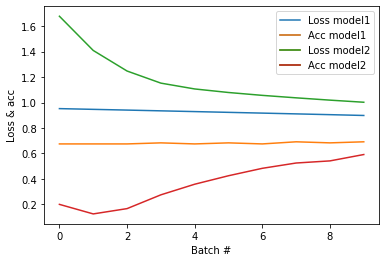

In [87]:
import matplotlib.pyplot as plt

loss1, = plt.plot(history.history['loss'], label = 'loss model1')
acc1, = plt.plot(history.history['accuracy'], label = 'acc model1')

loss2, = plt.plot(history2.history['loss'], label = 'loss model2')
acc2, = plt.plot(history2.history['accuracy'], label = 'acc model2')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss model1', 'Acc model1', 'Loss model2', 'Acc model2'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')


In [89]:
print('performance of simple ANN ')
test_loss1, test_acc1 = model.evaluate(irisTestData, irisTestLabels, verbose=2)
print('performance of more complex ANN ')
test_loss2, test_acc2 = model2.evaluate(irisTestData, irisTestLabels, verbose=2)


performance of simple ANN 
1/1 - 0s - loss: 0.9581 - accuracy: 0.5000
performance of more complex ANN 
1/1 - 0s - loss: 0.9584 - accuracy: 0.6000


11493376/11490434 [==============================] - 0s 0us/step


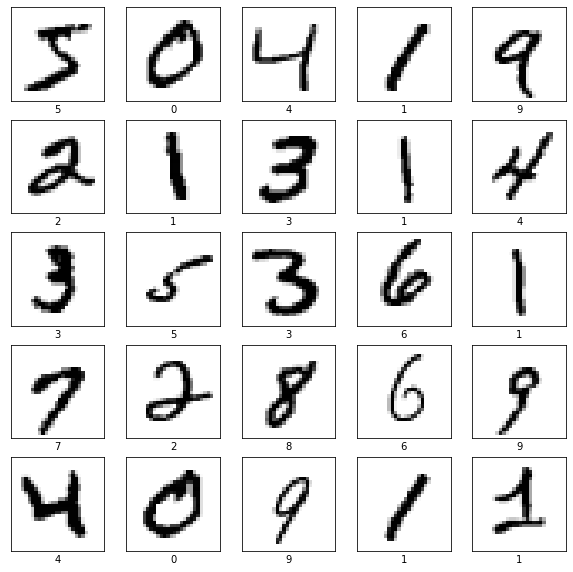

In [90]:
# CNN example

# load data
mnist = tf.keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# normalise
trainImages, testImages = trainImages / 255, testImages / 255

# transform labels into one-hot encoding
trainLabels1hot = tf.keras.utils.to_categorical(trainLabels, 10)
testLabels1hot = tf.keras.utils.to_categorical(testLabels, 10)


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()


In [93]:
modelANN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelANN.summary()

modelANN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
historyANN = modelANN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=3)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_109 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_110 (Dense)            (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
469/469 [==============================] - 2s 4ms/step - loss: 1.2482 - accuracy: 0.6606
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.5422 - accuracy: 0.8583
Epoch 3/3
469/469 [============================

In [94]:
# input image dimensions
# loaded mnist data are 28x28 images, but CNN requires new reshapes (28x28x1)
img_rows, img_cols = 28, 28
trainImages = trainImages.reshape(trainImages.shape[0], img_rows, img_cols, 1)
testImages = testImages.reshape(testImages.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

modelCNN = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary()

modelCNN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = modelCNN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=3)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)             

Text(0, 0.5, 'Loss & acc')

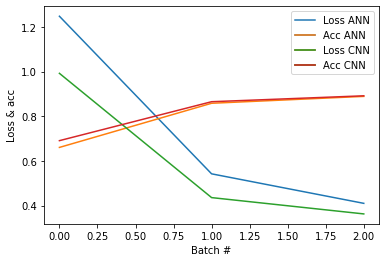

In [95]:
import matplotlib.pyplot as plt

loss1, = plt.plot(historyANN.history['loss'], label = 'loss ANN')
acc1, = plt.plot(historyANN.history['accuracy'], label = 'acc ANN')

loss2, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc2, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss ANN', 'Acc ANN', 'Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')

In [103]:
# LeNet network

from sklearn.model_selection import train_test_split
trainImages, validImages, trainLabels1hot, validLabels1hot = train_test_split(
    trainImages, trainLabels1hot, test_size = 0.1, random_state=42)


# activationType = 'sigmoid'
activationType = 'relu'

# LeNet5 (activation = sigmoid)
modelLeNet = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation=activationType,
                               padding='same'),
  tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
  tf.keras.layers.Conv2D(filters=16, kernel_size=3,
                               activation=activationType),
  tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation=activationType),
  tf.keras.layers.Dense(84, activation=activationType),
  # tf.keras.layers.Dense(10)])  # a linear activation is not enough for classification problems
  tf.keras.layers.Dense(10, activation='softmax')])



modelLeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def step_decay(epoch):
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

print('# Fit model on training data ')
history = modelLeNet.fit(trainImages, trainLabels1hot, 
                    validation_data=(validImages, validLabels1hot), 
                    batch_size=128, epochs=3, 
                    callbacks=callbacks_list, 
                    verbose=1)
print('\nhistory dict:', history.history)

modelLeNet.summary()



# Fit model on training data 
Epoch 1/3
380/380 [==============================] - 18s 48ms/step - loss: 0.7588 - accuracy: 0.7679 - val_loss: 0.2594 - val_accuracy: 0.9167
Epoch 2/3
380/380 [==============================] - 18s 48ms/step - loss: 0.1839 - accuracy: 0.9437 - val_loss: 0.1514 - val_accuracy: 0.9541
Epoch 3/3
380/380 [==============================] - 18s 48ms/step - loss: 0.1149 - accuracy: 0.9641 - val_loss: 0.1267 - val_accuracy: 0.9589

history dict: {'loss': [0.7588186264038086, 0.18394780158996582, 0.11485989391803741], 'accuracy': [0.7678600549697876, 0.9436625242233276, 0.9640740752220154], 'val_loss': [0.2594316899776459, 0.15144960582256317, 0.12672777473926544], 'val_accuracy': [0.9166666865348816, 0.9540740847587585, 0.9588888883590698], 'lr': [0.1, 0.1, 0.06]}
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)

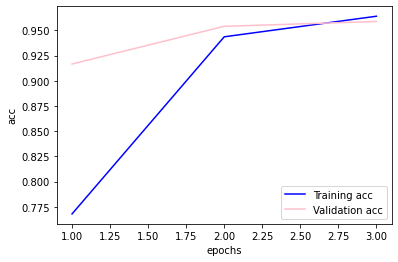

In [104]:
lossTrain = history.history['loss']
accTrain = history.history['accuracy']
lossValid = history.history['val_loss']
accValid = history.history['val_accuracy']

epochs = range(1, len(lossTrain) + 1)
plt.plot(epochs, accTrain, color = 'blue', label = 'Training acc')
plt.plot(epochs, accValid, color = 'pink', label = 'Validation acc')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()


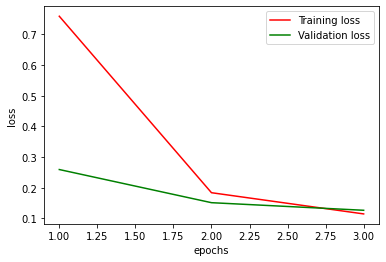

In [105]:
epochs = range(1, len(lossTrain) + 1)
plt.plot(epochs, lossTrain, color = 'red', label = 'Training loss')
plt.plot(epochs, lossValid, color = 'green', label = 'Validation loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [106]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(testLabels, np.argmax(modelLeNet.predict(testImages), axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.89      0.98      0.94      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.92      0.95       892
           6       0.97      0.98      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.93      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


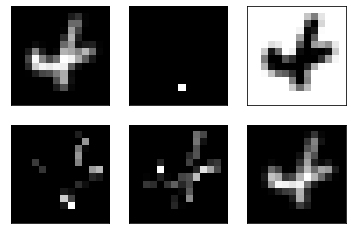

In [107]:
# visualise the feature maps
# http://www.iro.umontreal.ca/~lisa/publications2/index.php/publications/show/247
# https://cs231n.github.io/understanding-cnn/
from keras.models import Model
# redefine model to output right after the first hidden layer
model = Model(inputs=modelLeNet.inputs, outputs=modelLeNet.layers[1].output)
model.summary()
feature_maps = model.predict(trainImages[0].reshape(1, 28, 28, 1))
# plot all 6 maps (first conv layer has 6 filters) in 2x3 squares
ix = 1
for _ in range(2):
	for _ in range(3):		# specify subplot and turn of axis
		ax = plt.subplot(2, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])		
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray') # plot filter channel in grayscale
		ix += 1
plt.show() # show the figure

In [ ]:
# TO DOs for a CNN

# Replace the average pooling with max pooling. What happens?

# Try to construct a more complex network based on LeNet to improve its accuracy.

# Adjust the convolution window size.

# Adjust the number of output channels.

# Adjust the activation function (e.g., ReLU).

# Adjust the number of convolution layers.

# Adjust the number of fully connected layers.

# Adjust the learning rates and other training details (e.g., initialization and number of epochs.)

